<a href="https://colab.research.google.com/github/RexManglicmot/Financial-Analysis/blob/main/Financial_Analysis_of_Moderna_and_Pfizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Status: Continuing Working Document

Hi! My name is Rex, and I'm working on building my data science skills and I would to get feedback on the code below. Any mistakes or misinterpretation of the data are my own.

Things need to do:

* flush out intro
* get data for Pfizer and Merck with the same dates
* put more analysis in each of the outputs and explain in laymen terms
* get feedback on the code


## Introduction

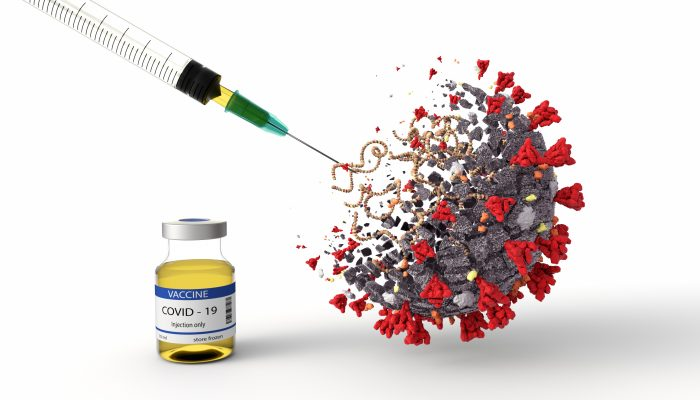

With the onset of COVID-19 in 2020, there was a sudden push for scientists and research laboratories, both public and private, to understand the pandemic and produce a vaccine. A few biotechnology companies emerge as clear winners as they provided a vaccine that would help combat covid. These companies included Moderna, Merck, and Pfizer. 

The goal of this project is to understand how the pandemic played a role each companies' instrinsic value (i.e., stock price) and to quanitfy such.

The dataset MRNA.csv is was downloaed from Yahoo Finance consisting of the dates from October 2019 to Jan 2023. I chose the former date because it provided a buffer what the Moderna stock was before the uneventful pandemic occured in December 2019. I chose the latter date to reflect the current date of this project (2023). The same concept was used also used to get the Pfizer datasets. 

The dataset contains the below features. With the exception to Date which contains date values, the rest of the features are numerical (? there is a better to write this).

* Date
* Open
* High
* Low
* Close
* Adjusted Close
* Volume



## Loading Libraries

In [ ]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

In [ ]:
#load files from local computer
#file is also located within Githuh repository
from google.colab import files
uploaded = files.upload()

Saving MRNA.csv to MRNA.csv


In [ ]:
#load the data
data_m_orig = pd.read_csv('MRNA.csv')

In [ ]:
#View the first few rows of the data
data_m_orig.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-01,15.87,16.059999,14.80,14.81,14.81,1544900
1,2019-10-02,14.78,15.010000,14.42,14.86,14.86,1783300
2,2019-10-03,15.24,15.240000,14.41,15.07,15.07,1464200
3,2019-10-04,15.05,15.570000,14.89,15.51,15.51,1021400
4,2019-10-07,15.45,15.630000,15.07,15.47,15.47,1373900


## Cleaning the Data

Let's create copy for data manipulation. We noticed from above that the index column is present in our dataset. So lets get rid of that.


> Indented block



In [ ]:
from pickle import TRUE
#create a copy of the original dataset
#we want to parse the date column as the index
#parse the dates which ensures the dates are represented as Dates and not as strings
data_m = pd.read_csv('MRNA.csv', index_col=0, parse_dates= ['Date'])


In [ ]:
#look at the first few rows of the dataset
data_m.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-01,15.87,16.059999,14.80,14.81,14.81,1544900
2019-10-02,14.78,15.010000,14.42,14.86,14.86,1783300
2019-10-03,15.24,15.240000,14.41,15.07,15.07,1464200
2019-10-04,15.05,15.570000,14.89,15.51,15.51,1021400
2019-10-07,15.45,15.630000,15.07,15.47,15.47,1373900


In [ ]:
#look at the data types of the variables
data_m.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
data_m.index

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10',
               '2019-10-11', '2019-10-14',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-13'],
              dtype='datetime64[ns]', name='Date', length=868, freq=None)

In [ ]:
#indexing the first observation
data_m.iloc[0]

Open         1.587000e+01
High         1.606000e+01
Low          1.480000e+01
Close        1.481000e+01
Adj Close    1.481000e+01
Volume       1.544900e+06
Name: 2019-10-01 00:00:00, dtype: float64

In [ ]:
#indexing the last observation
data_m.iloc[-1]

Open         1.384900e+02
High         1.489400e+02
Low          1.380600e+02
Close        1.479000e+02
Adj Close    1.479000e+02
Volume       5.681300e+06
Name: 2023-03-13 00:00:00, dtype: float64

Ok, we see some differences. To help understand them better, let's put the first and last rows into a table.

In [ ]:
#let's index another way and put into a table
result = data_m.iloc[[0, -1]]

#print out
print(result)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-10-01   15.870000   16.059999   14.800000   14.810000   14.810000   
2023-03-13  138.490005  148.940002  138.059998  147.899994  147.899994   

             Volume  
Date                 
2019-10-01  1544900  
2023-03-13  5681300  


As we compare the differences we see there is a huge difference among the variables from the start to end.

For example, the Open, Close, and Volume percentage can be calculated by [(Last - First)/First]*100:

* Open: [(138 - 16)/16]*100 = +763%
* Close: [(148 - 15)/15]*100 = +887%
* Volume:[(5681300 - 1544900)/1544900]*100 = +268%

Insights:

* With Moderna providing vaccines not only to the US but to the rest of the world, it played a role increasing it's stock value.

In [ ]:
#take a look at the Close column
data_m['Open']

Date
2019-10-01     15.870000
2019-10-02     14.780000
2019-10-03     15.240000
2019-10-04     15.050000
2019-10-07     15.450000
                 ...    
2023-03-07    143.779999
2023-03-08    140.320007
2023-03-09    142.039993
2023-03-10    137.059998
2023-03-13    138.490005
Name: Open, Length: 868, dtype: float64

We see different values of the Moderna stock price, the number of observations and the data type (float). Recall, that each column can be one data type.

In [ ]:
#understand more about the column
type(data_m['Open'])

pandas.core.series.Series

We see that the column are in Series. 

In [ ]:
#Calculate the difference between the Open and Close
daily_change = data_m['Open'] - data_m['Close']

#print out results
print(daily_change)

Date
2019-10-01    1.060000
2019-10-02   -0.080000
2019-10-03    0.170000
2019-10-04   -0.460000
2019-10-07   -0.020000
                ...   
2023-03-07    2.729996
2023-03-08   -1.759995
2023-03-09    4.679992
2023-03-10   -1.229995
2023-03-13   -9.409989
Length: 868, dtype: float64


In [ ]:
#Calculate the daily percentage change
daily_pct_change = (data_m['Close'] - data_m['Open'])/data_m['Open']*100

#print results
print(daily_pct_change)

Date
2019-10-01   -6.679269
2019-10-02    0.541272
2019-10-03   -1.115486
2019-10-04    3.056478
2019-10-07    0.129450
                ...   
2023-03-07   -1.898731
2023-03-08    1.254272
2023-03-09   -3.294841
2023-03-10    0.897414
2023-03-13    6.794706
Length: 868, dtype: float64


In [ ]:
#normalzie the data by dividing each observation in the series by the original starting value
norm_open = data_m['Open']/data_m['Open'].iloc[0]

#print results
print(norm_open)

Date
2019-10-01    1.000000
2019-10-02    0.931317
2019-10-03    0.960302
2019-10-04    0.948330
2019-10-07    0.973535
                ...   
2023-03-07    9.059861
2023-03-08    8.841840
2023-03-09    8.950220
2023-03-10    8.636421
2023-03-13    8.726528
Name: Open, Length: 868, dtype: float64


## Exploratory Data Analysis

## Limitations

## Conclusion

## Inspiration for this project